## CIFAR-10 Object Recognition using ResNet50

In [2]:
!pip install kaggle

In [9]:
#configuring the path of kaggle json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle competitions download -c cifar-10

In [11]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [12]:
# extracting the dataset
from zipfile import ZipFile
dataset = "/content/cifar-10.zip"
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [13]:
!pip install py7zr # since the file is in .7z format we cant access it directly

In [14]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall() # to extract at a particular path archive.extractall(path = '/content/sample_data')
archive.close()

In [15]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the dependencies

In [16]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [17]:
filenames = os.listdir("/content/train")

In [18]:
type(filenames)

list

In [19]:
filenames

['46799.png',
 '26848.png',
 '10286.png',
 '25023.png',
 '26445.png',
 '7774.png',
 '21037.png',
 '33825.png',
 '30758.png',
 '16365.png',
 '6372.png',
 '26733.png',
 '15666.png',
 '23520.png',
 '21011.png',
 '39749.png',
 '8840.png',
 '18067.png',
 '30738.png',
 '7665.png',
 '41169.png',
 '7628.png',
 '3131.png',
 '30364.png',
 '23800.png',
 '37952.png',
 '23454.png',
 '19138.png',
 '35470.png',
 '42829.png',
 '46506.png',
 '35334.png',
 '14025.png',
 '45709.png',
 '17964.png',
 '18346.png',
 '21633.png',
 '12356.png',
 '44153.png',
 '27852.png',
 '38573.png',
 '37288.png',
 '32990.png',
 '34593.png',
 '1471.png',
 '45730.png',
 '3768.png',
 '30958.png',
 '40762.png',
 '35718.png',
 '36557.png',
 '6328.png',
 '35286.png',
 '2546.png',
 '10598.png',
 '25559.png',
 '42430.png',
 '18292.png',
 '49050.png',
 '11650.png',
 '40041.png',
 '27870.png',
 '188.png',
 '10487.png',
 '47351.png',
 '44724.png',
 '1308.png',
 '40261.png',
 '23548.png',
 '24279.png',
 '43958.png',
 '33946.png',
 '310

In [20]:
len(filenames)

50000

In [21]:
print(filenames[0:5]) # print the first five file names
print(filenames[-5:]) # print the last five file names

['46799.png', '26848.png', '10286.png', '25023.png', '26445.png']
['10305.png', '21471.png', '1537.png', '42258.png', '42907.png']


Labels Processing

In [22]:
labels_df = pd.read_csv("/content/trainLabels.csv")

In [23]:
labels_df.shape

(50000, 2)

In [24]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [25]:
labels_df[labels_df["id"] == 46799]

,id,label
46798,46799,bird


In [26]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [27]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [28]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [29]:
labels_dictionary = {
    'airplane' : 0,
    'automobile' : 1,
    'bird' : 2,
    'cat' : 3,
    'deer' : 4,
    'dog' : 5,
    'frog' : 6,
    'horse' :7,
    'ship' : 8,
    'truck' : 9
}
labels = [labels_dictionary[i] for i in labels_df['label']]

In [30]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


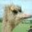

In [31]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/train/46799.png')  # Replace with your image path
cv2_imshow(image)

In [32]:
id_list = list(labels_df['id'])

In [33]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


Image Processing

In [34]:
# convert the images to numpy arrays
train_data_folder = '/content/train/'
data = []
for id in id_list :
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [35]:
type(data)

list

In [36]:
len(data)

50000

In [37]:
print(data[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [38]:
data[0].shape

(32, 32, 3)

In [39]:
#convert image list and label list to numpy arrays
X = np.array(data)
y = np.array(labels)

In [40]:
X.shape

(50000, 32, 32, 3)

In [41]:
y.shape

(50000,)

Train Test Split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [43]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3)
(40000,) (10000,)


In [44]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [45]:
X_train_scaled[0]

array([[[0.81960784, 0.82352941, 0.79607843],
        [0.83529412, 0.83921569, 0.81960784],
        [0.85490196, 0.85882353, 0.84313725],
        ...,
        [0.49803922, 0.29019608, 0.15294118],
        [0.47843137, 0.26666667, 0.1372549 ],
        [0.45490196, 0.24705882, 0.1254902 ]],

       [[0.82352941, 0.82352941, 0.79215686],
        [0.83529412, 0.83921569, 0.81176471],
        [0.85490196, 0.8627451 , 0.83921569],
        ...,
        [0.48627451, 0.2745098 , 0.1372549 ],
        [0.4745098 , 0.2627451 , 0.12941176],
        [0.48235294, 0.27058824, 0.14117647]],

       [[0.80784314, 0.80392157, 0.76470588],
        [0.81960784, 0.81960784, 0.79215686],
        [0.83529412, 0.84313725, 0.81960784],
        ...,
        [0.48627451, 0.2745098 , 0.14509804],
        [0.51372549, 0.30196078, 0.16470588],
        [0.51372549, 0.30588235, 0.16078431]],

       ...,

       [[0.49803922, 0.42352941, 0.38039216],
        [0.54117647, 0.47843137, 0.43137255],
        [0.55294118, 0

Building the neural network

In [46]:
import tensorflow as tf
from tensorflow import keras

In [47]:
#setting up the layers of neural network
number_of_classes = 10
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(number_of_classes, activation = 'softmax') # for binary class problems we use sigmoid but in case of multi class problem we can use softmax
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [49]:
# training the model
model.fit(X_train_scaled, y_train, validation_split = 0.1, epochs = 10)
# epoch means the weights will be updated through forward and backward propagation, validation means the 10% of the data will be reserved

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.2575 - loss: 2.0522 - val_acc: 0.3262 - val_loss: 1.8784
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - acc: 0.3413 - loss: 1.8479 - val_acc: 0.3590 - val_loss: 1.8065
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3611 - loss: 1.7886 - val_acc: 0.3540 - val_loss: 1.8262
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3783 - loss: 1.7442 - val_acc: 0.3795 - val_loss: 1.7259
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.3893 - loss: 1.7249 - val_acc: 0.4025 - val_loss: 1.6834
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3898 - loss: 1.7103 - val_acc: 0.3735 - val_loss: 1.7459
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.3958 - loss: 1.6925 - val_acc: 0.3930 - val_loss: 1.6855
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.4040 - loss: 1.6781 - val_acc: 0.3742 - val_loss: 1.7535
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

For image recognition CNN works better, in this case the accuracy boils down to 41% hence we will be using transfer learning in this case.

###ResNet50

In [50]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [51]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3)) # imagenet is the resource of images
#when resnet model is trained on imagenet data it retains some weight and with our custom data we will update these weights
# resnet50 takes images in this shape(256, 256, 3)
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

The convolutional base does not have output layer hence we can add our layers.

In [52]:
model = models.Sequential()
model.add(layers.UpSampling2D((2, 2))) # height and width will be multiplied by 2 times
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.UpSampling2D((2, 2))) # 32 * 2 * 2 * 2 = 256
model.add(convolutional_base)
model.add(layers.Flatten()) # converts the image matrix to vectors so that they are in 1D format
model.add(layers.BatchNormalization())
#all the values in the same range - normalization : batch normalization is present at the
#end of each layers so that so that the output of the prior layer is normalized efficiently;
#the initial values we pass are normalized but the processed values might not be normalized hence we use batch normalization
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
# neural networks has a tendency to overfit; dropout turn out some neurons so that there output is 0 which prevents overfitting
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(number_of_classes, activation='softmax'))

In [57]:
model.compile(optimizer= optimizers.RMSprop(learning_rate=2e-5),loss = "sparse_categorical_crossentropy", metrics = ['acc'])

In [58]:
history = model.fit(X_train_scaled, y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 426s 332ms/step - acc: 0.3191 - loss: 2.0336 - val_acc: 0.7793 - val_loss: 0.8158
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 407s 327ms/step - acc: 0.6706 - loss: 1.0784 - val_acc: 0.8955 - val_loss: 0.4681
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 391s 335ms/step - acc: 0.8032 - loss: 0.7564 - val_acc: 0.9150 - val_loss: 0.3517
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 335ms/step - acc: 0.8623 - loss: 0.5835 - val_acc: 0.9290 - val_loss: 0.2913
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 377s 335ms/step - acc: 0.9060 - loss: 0.4439 - val_acc: 0.9335 - val_loss: 0.2736
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 335ms/step - acc: 0.9373 - loss: 0.3510 - val_acc: 0.9392 - val_loss: 0.2371
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 335ms/step - acc: 0.9486 - loss: 0.2879 - val_acc: 0.9370 - val_loss: 0.2343
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 335ms/step - acc: 0.9623 - loss: 0.2376 - val_acc: 0.9395 - val_loss: 0.2240
Epoch 9/

In [59]:
loss, acc = model.evaluate(X_test_scaled, y_test)
print('Test accuracy : ',acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 103ms/step - acc: 0.9426 - loss: 0.2216
Test accuracy :  0.9416000247001648


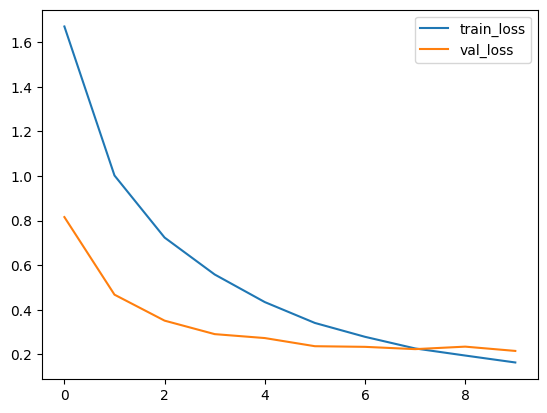

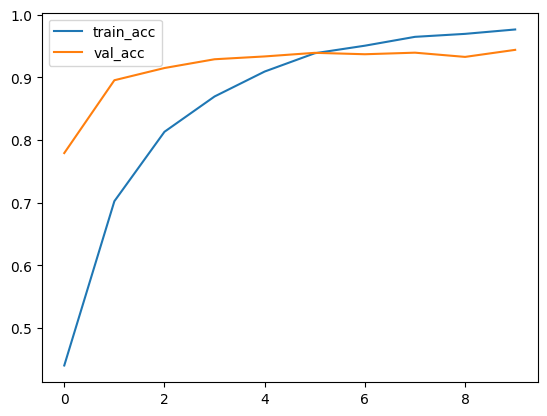

In [60]:
h = history
#plot the loss value
plt.plot(h.history['loss'], label = 'train_loss')
plt.plot(h.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label = 'train_acc')
plt.plot(h.history['val_acc'], label = 'val_acc')
plt.legend()
plt.show()